In [1]:
import pandas as pd

import sys
sys.path.insert(0, '..')
from utils.latex import show_latex
from utils.config import PATHS

In [2]:
datapath = PATHS.getpath('data') / 'umcu'

df = pd.read_csv(datapath / 'APROOF_UMCU_20211126_008.csv', sep=';').rename(columns={'Pseudoniem BSN': 'pat'})

df.datum = pd.to_datetime(df.datum)

# Number of patients

In [3]:
df.pat.nunique()

1150

# Dates

In [4]:
df.datum.describe(datetime_is_numeric=True)

count                            95838
mean     2021-02-20 06:19:56.769548544
min                2020-01-10 00:00:00
25%                2020-12-16 00:00:00
50%                2021-02-23 00:00:00
75%                2021-04-30 00:00:00
max                2021-12-07 00:00:00
Name: datum, dtype: object

# Number of notes

In [5]:
df.NotitieID.nunique()

95774

# Notes per patient

<AxesSubplot:>

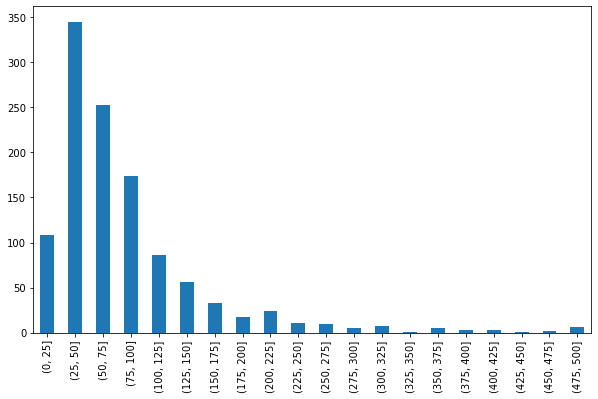

In [6]:
# patients with over 500 notes are counted in the (475, 500] bin

s = df.groupby('pat').NotitieID.size()
s.loc[lambda s: s > 500] = 500
bins = range(0,525,25)
pd.cut(s, bins=bins).value_counts(sort=False).plot.bar(figsize=(10,6))

# Labels

In [7]:
domains=['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM']
levels = [f"{domain}_lvl" for domain in domains]

In [8]:
df[levels].agg('count')

ADM_lvl    36147
ATT_lvl      216
BER_lvl      236
ENR_lvl     5622
ETN_lvl    11114
FAC_lvl     5950
INS_lvl     4375
MBW_lvl      892
STM_lvl     9060
dtype: int64

In [9]:
df_any_lvl = df.assign(any_lvl = df[levels].any(axis=1))
df_any_lvl.any_lvl.sum()

46367

array([[<AxesSubplot:title={'center':'ADM_lvl'}>,
        <AxesSubplot:title={'center':'ATT_lvl'}>,
        <AxesSubplot:title={'center':'BER_lvl'}>],
       [<AxesSubplot:title={'center':'ENR_lvl'}>,
        <AxesSubplot:title={'center':'ETN_lvl'}>,
        <AxesSubplot:title={'center':'FAC_lvl'}>],
       [<AxesSubplot:title={'center':'INS_lvl'}>,
        <AxesSubplot:title={'center':'MBW_lvl'}>,
        <AxesSubplot:title={'center':'STM_lvl'}>]], dtype=object)

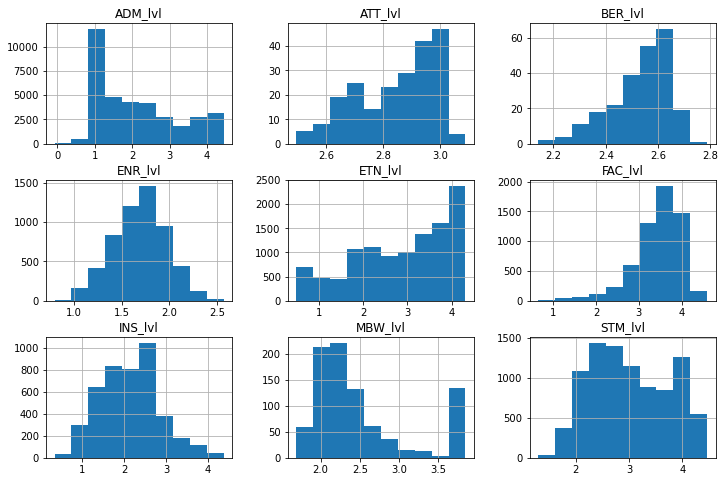

In [10]:
df[levels].hist(figsize=(12,8))